In [1]:
import random
import numpy as np

In [13]:

# จำนวนวันทั้งหมด (6 ม.ค. 2568 - 15 พ.ค. 2568)
total_days = 7  # คุณสามารถคำนวณจำนวนวันจริงได้
time_slots = 24

# กิจกรรมที่เป็นไปได้
activities = ['sleep', 'work', 'nlp_course', 'other_courses', 'homework', 'thesis', 'exercise', 'rest']
activity_indices = {activity: idx for idx, activity in enumerate(activities)}

num_genes = total_days * time_slots

# เริ่มต้นเวกเตอร์ความน่าจะเป็น
prob_vector = np.full((num_genes, len(activities)), 1 / len(activities))


In [3]:

# ฟิตเนสฟังก์ชัน
def fitness(chromosome):
    score = 0
    daily_schedules = np.reshape(chromosome, (total_days, time_slots))
    
    for day_index in range(total_days):
        day_schedule = daily_schedules[day_index]
        activity_counts = {activity: np.count_nonzero(day_schedule == activity_indices[activity]) for activity in activities}
        
        # นอนหลับ
        sleep_hours = activity_counts['sleep']
        if sleep_hours >= 7:
            score += 10
        else:
            score -= 10
        
        # ทำงาน
        work_hours = activity_counts['work']
        if work_hours != 8:
            score -= abs(work_hours - 8) * 5
        
        # หลีกเลี่ยงการเรียนวิชาที่ยากในวันอังคารและพฤหัส
        weekday = (6 + day_index) % 7  # 0=จันทร์, 1=อังคาร, ..., 6=อาทิตย์
        if weekday in [1, 3]:  # อังคารและพฤหัส
            nlp_hours = activity_counts['nlp_course']
            if nlp_hours > 0:
                score -= nlp_hours * 5
        
        # ออกกำลังกาย
        exercise_hours = activity_counts['exercise']
        if exercise_hours > 0:
            score += 5
        
        # ทำ Thesis
        thesis_hours = activity_counts['thesis']
        score += thesis_hours * 2
        
        # พักผ่อน
        rest_hours = activity_counts['rest']
        score += rest_hours
        
        # ตรวจสอบเวลารวม
        total_hours = sum(activity_counts.values())
        if total_hours != 24:
            score -= abs(24 - total_hours) * 10
    
    return score

# สร้างโครโมโซม
def generate_chromosome(prob_vector):
    chromosome = []
    for probs in prob_vector:
        activity = np.random.choice(activities, p=probs)
        chromosome.append(activity_indices[activity])
    return np.array(chromosome)

# อัพเดตเวกเตอร์ความน่าจะเป็น
def update_probability_vector(prob_vector, winner, loser, population_size):
    for i in range(len(prob_vector)):
        winner_gene = winner[i]
        loser_gene = loser[i]
        
        if winner_gene != loser_gene:
            prob_vector[i][winner_gene] += 1.0 / population_size
            prob_vector[i][loser_gene] -= 1.0 / population_size
            prob_vector[i] = np.clip(prob_vector[i], 0.0, 1.0)
            prob_vector[i] /= np.sum(prob_vector[i])

In [8]:
# วนลูปหลัก
population_size = 50
max_iterations = 10
desired_max_score = 1  # กำหนดคะแนนที่ต้องการ

for iteration in range(max_iterations):
    chrom1 = generate_chromosome(prob_vector)
    chrom2 = generate_chromosome(prob_vector)

    print('chrom2', chrom2)
    print('chrom1',chrom1)
    
    fit1 = fitness(chrom1)
    fit2 = fitness(chrom2)
    
    print('fit1', fit1)
    print('fit1',fit1)

    if fit1 > fit2:
        winner, loser = chrom1, chrom2
        best_fit = fit1
    else:
        winner, loser = chrom2, chrom1
        best_fit = fit2
    
    update_probability_vector(prob_vector, winner, loser, population_size)
    
    if best_fit >= desired_max_score:
        print(f"Optimal schedule found at iteration {iteration}")
        best_chromosome = winner
        break
else:
    print("Max iterations reached without finding optimal schedule")
    best_chromosome = winner  # หรือเลือกโครโมโซมที่ดีที่สุดจากการวนลูปทั้งหมด

chrom2 [1 6 1 ... 7 7 4]
chrom1 [7 2 1 ... 1 7 1]
fit1 -1359
fit1 -1359
chrom2 [0 5 7 ... 2 1 4]
chrom1 [4 5 7 ... 1 7 4]
fit1 -1393
fit1 -1393
chrom2 [1 0 6 ... 2 7 1]
chrom1 [0 5 6 ... 2 7 1]
fit1 -1296
fit1 -1296
chrom2 [0 5 6 ... 1 1 1]
chrom1 [0 6 6 ... 1 1 1]
fit1 -1280
fit1 -1280
chrom2 [0 6 6 ... 5 1 4]
chrom1 [1 2 6 ... 1 1 1]
fit1 -1562
fit1 -1562
chrom2 [0 5 6 ... 2 1 1]
chrom1 [0 5 6 ... 7 1 1]
fit1 -1394
fit1 -1394
chrom2 [0 6 1 ... 7 7 1]
chrom1 [1 2 6 ... 1 7 4]
fit1 -1408
fit1 -1408
chrom2 [4 6 7 ... 2 1 4]
chrom1 [0 5 6 ... 7 7 1]
fit1 -1266
fit1 -1266
chrom2 [0 2 7 ... 5 7 1]
chrom1 [0 5 7 ... 2 7 4]
fit1 -1395
fit1 -1395
chrom2 [0 5 6 ... 7 7 1]
chrom1 [0 5 1 ... 2 1 1]
fit1 -1427
fit1 -1427
Max iterations reached without finding optimal schedule


In [ ]:


# แสดงตารางเวลาที่ดีที่สุด
def display_schedule(chromosome):
    daily_schedules = np.reshape(chromosome, (total_days, time_slots))
    for day_index in range(total_days):
        day_schedule = daily_schedules[day_index]
        day_activities = [activities[gene] for gene in day_schedule]
        date = f"Day {day_index + 1}"
        print(f"{date}: {day_activities}")

# เรียกใช้ฟังก์ชันแสดงตารางเวลา
display_schedule(best_chromosome)


In [19]:
# first draft
import random

# Parameters
DAYS = 7  # Total days from Jan 6 to May 15
TIME_SLOTS = 24  # Hours in a day
WEEKDAYS = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Activity dictionary with priority levels
activities = {
    'study_nlp': 4,
    'study_big_data': 3,
    'study_inf_storage': 3,
    'study_cv': 5,
    'homework': 3,
    'thesis': 5,
    'exercise': 2,
    'rest': 0,
    'sleep': 0
}

# Chromosome structure: DAYS * TIME_SLOTS genes
def create_chromosome():
    return [random.choice(list(activities.keys())) for _ in range(DAYS * TIME_SLOTS)]

# Fitness function
def fitness(chromosome):
    score = 0
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = chromosome[day_index * TIME_SLOTS: (day_index + 1) * TIME_SLOTS]
        
        # Penalty for hard study on office days
        if day in ['Tue', 'Thu']:
            score -= sum(5 for activity in daily_schedule if activity in ['study_cv', 'study_nlp'])

        # Reward for balanced schedule and rest
        if daily_schedule.count('sleep') >= 7:
            score += 10
        if 'exercise' in daily_schedule:
            score += 2
        
        # Other rules for study allocation, homework, and thesis
        score += daily_schedule.count('thesis') * 4

    return score


# Initial population
population = [create_chromosome() for _ in range(5)]
generations = 100

print('population',population)

# GA algorithm loop
initial_ramdom = []

for gen in range(generations):
    population = sorted(population, key=fitness, reverse=True)
    next_generation = []
    
    # Crossover
    for _ in range(len(population) // 2):
        parent1 = random.choice(population[:20])
        if not initial_ramdom:
            initial_ramdom.append(parent1)
        parent2 = random.choice(population[:20])
        cross_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:cross_point] + parent2[cross_point:]
        child2 = parent2[:cross_point] + parent1[cross_point:]
        next_generation.extend([child1, child2])

    # Mutation
    for individual in next_generation:
        if random.random() < 0.1:
            mutate_point = random.randint(0, len(individual) - 1)
            individual[mutate_point] = random.choice(list(activities.keys()))

    population = next_generation

best_schedule = max(population, key=fitness)
print("Initial schedule found:", initial_ramdom)
print("Best schedule found:", best_schedule)



population [['exercise', 'study_nlp', 'study_big_data', 'exercise', 'exercise', 'study_nlp', 'study_cv', 'study_inf_storage', 'study_nlp', 'study_inf_storage', 'rest', 'thesis', 'homework', 'sleep', 'homework', 'study_inf_storage', 'study_nlp', 'exercise', 'homework', 'study_inf_storage', 'exercise', 'study_inf_storage', 'sleep', 'thesis', 'study_inf_storage', 'study_big_data', 'study_nlp', 'study_big_data', 'study_cv', 'study_big_data', 'sleep', 'study_cv', 'rest', 'rest', 'study_big_data', 'study_cv', 'rest', 'homework', 'homework', 'study_cv', 'exercise', 'study_nlp', 'sleep', 'rest', 'thesis', 'homework', 'study_big_data', 'thesis', 'study_nlp', 'rest', 'exercise', 'study_cv', 'study_cv', 'exercise', 'thesis', 'study_inf_storage', 'exercise', 'rest', 'study_nlp', 'study_cv', 'exercise', 'study_nlp', 'exercise', 'study_nlp', 'study_cv', 'exercise', 'rest', 'study_inf_storage', 'study_inf_storage', 'thesis', 'study_big_data', 'sleep', 'thesis', 'exercise', 'study_nlp', 'study_nlp', '

In [16]:

# Initial population
population = [create_chromosome() for _ in range(5)]
generations = 100

print(population)

[['sleep', 'study_inf_storage', 'study_big_data', 'thesis', 'study_nlp', 'homework', 'study_nlp', 'study_nlp', 'sleep', 'study_nlp', 'homework', 'study_cv', 'study_big_data', 'homework', 'study_cv', 'homework', 'study_inf_storage', 'study_big_data', 'homework', 'study_cv', 'study_inf_storage', 'exercise', 'exercise', 'homework', 'study_inf_storage', 'homework', 'homework', 'study_inf_storage', 'thesis', 'sleep', 'rest', 'thesis', 'study_cv', 'study_inf_storage', 'study_big_data', 'study_inf_storage', 'study_cv', 'thesis', 'study_big_data', 'study_inf_storage', 'study_big_data', 'exercise', 'sleep', 'study_nlp', 'rest', 'study_inf_storage', 'study_nlp', 'study_nlp', 'study_inf_storage', 'study_cv', 'thesis', 'rest', 'thesis', 'study_nlp', 'study_cv', 'rest', 'exercise', 'study_nlp', 'study_inf_storage', 'thesis', 'study_big_data', 'study_cv', 'sleep', 'study_inf_storage', 'thesis', 'homework', 'rest', 'rest', 'study_inf_storage', 'study_nlp', 'study_inf_storage', 'study_nlp', 'rest', 'r

In [17]:
# GA algorithm loop
initial_ramdom = []

for gen in range(generations):
    population = sorted(population, key=fitness, reverse=True)
    next_generation = []
    
    # Crossover
    for _ in range(len(population) // 2):
        parent1 = random.choice(population[:20])
        if not initial_ramdom:
            initial_ramdom.append(parent1)
        parent2 = random.choice(population[:20])
        cross_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:cross_point] + parent2[cross_point:]
        child2 = parent2[:cross_point] + parent1[cross_point:]
        next_generation.extend([child1, child2])

    # Mutation
    for individual in next_generation:
        if random.random() < 0.1:
            mutate_point = random.randint(0, len(individual) - 1)
            individual[mutate_point] = random.choice(list(activities.keys()))

    population = next_generation

best_schedule = max(population, key=fitness)
print("Initial schedule found:", initial_ramdom)
print("Best schedule found:", best_schedule)


Initial schedule found: [['study_inf_storage', 'rest', 'thesis', 'rest', 'exercise', 'rest', 'study_inf_storage', 'rest', 'exercise', 'homework', 'rest', 'study_nlp', 'thesis', 'rest', 'thesis', 'homework', 'study_inf_storage', 'rest', 'homework', 'homework', 'study_inf_storage', 'exercise', 'thesis', 'sleep', 'study_nlp', 'sleep', 'study_cv', 'sleep', 'rest', 'thesis', 'study_inf_storage', 'study_big_data', 'exercise', 'study_inf_storage', 'rest', 'exercise', 'sleep', 'study_cv', 'sleep', 'study_big_data', 'study_nlp', 'thesis', 'study_cv', 'study_big_data', 'study_nlp', 'thesis', 'rest', 'sleep', 'study_inf_storage', 'study_inf_storage', 'thesis', 'sleep', 'study_big_data', 'homework', 'study_cv', 'study_big_data', 'sleep', 'study_nlp', 'thesis', 'study_big_data', 'rest', 'homework', 'sleep', 'study_nlp', 'study_inf_storage', 'study_inf_storage', 'sleep', 'study_cv', 'rest', 'study_big_data', 'homework', 'study_cv', 'study_big_data', 'exercise', 'exercise', 'rest', 'study_inf_storage

In [20]:
import random

# Parameters
DAYS = 7  # Total days in a week
TIME_SLOTS = 24  # Hours in a day
WEEKDAYS = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Activity dictionary with priority levels
activities = {
    'sleep': 0,
    'work': 0,
    'study_nlp': 4,
    'study_big_data': 3,
    'study_inf_storage': 3,
    'study_cv': 5,
    'homework': 3,
    'thesis': 5,
    'exercise': 2,
    'rest': 0
}

# Define time constraints
work_hours = range(8, 18)  # Work from 8 AM to 6 PM
sleep_hours = list(range(22, 24)) + list(range(0, 6))  # Sleep from 10 PM to 6 AM

# Chromosome structure: DAYS * TIME_SLOTS genes
def create_chromosome():
    chromosome = []
    for day_index in range(DAYS):
        daily_schedule = []
        for hour in range(TIME_SLOTS):
            if hour in sleep_hours:
                daily_schedule.append('sleep')
            elif day_index in [0, 2, 4] and hour in work_hours:  # Mon, Wed, Fri
                daily_schedule.append('work')
            elif day_index in [1, 3] and hour in work_hours:  # Tue, Thu (Office days)
                daily_schedule.append('work')
            else:
                # Choose from other activities
                activity = random.choice(list(activities.keys()))
                if activity in ['sleep', 'work']:
                    activity = 'rest'  # Avoid duplicate sleep/work entries
                daily_schedule.append(activity)
        chromosome.extend(daily_schedule)
    return chromosome

# Fitness function
def fitness(chromosome):
    score = 0
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = chromosome[day_index * TIME_SLOTS: (day_index + 1) * TIME_SLOTS]
        
        # Penalty for hard study on office days
        if day in ['Tue', 'Thu']:
            hard_study_hours = daily_schedule.count('study_cv') + daily_schedule.count('study_nlp')
            score -= 5 * hard_study_hours
        
        # Reward for balanced schedule and rest
        sleep_hours_count = daily_schedule.count('sleep')
        if sleep_hours_count >= 7:
            score += 10
        else:
            score -= 10  # Penalty for insufficient sleep
        
        if 'exercise' in daily_schedule:
            score += 2
        
        # Reward for thesis work
        thesis_hours = daily_schedule.count('thesis')
        score += 4 * thesis_hours
        
        # Penalty if activities overlap with work hours
        for hour in work_hours:
            activity = daily_schedule[hour]
            if activity not in ['work', 'rest', 'sleep']:
                score -= 5  # Penalty for non-work activities during work hours
        
        # Penalty if sleep is not during sleep hours
        for hour in range(TIME_SLOTS):
            activity = daily_schedule[hour]
            if activity == 'sleep' and hour not in sleep_hours:
                score -= 2  # Penalty for sleeping outside sleep hours
        
    return score

# Initial population
population_size = 20
population = [create_chromosome() for _ in range(population_size)]
generations = 100

# Calculate fitness scores for initial population
initial_fitness_scores = [fitness(chrom) for chrom in population]

# Store the best initial schedule
best_initial_chromosome = population[initial_fitness_scores.index(max(initial_fitness_scores))]
best_initial_fitness = max(initial_fitness_scores)

# GA algorithm loop
for gen in range(generations):
    # Evaluate fitness
    fitness_scores = [fitness(chrom) for chrom in population]
    
    # Selection
    population = [chrom for _, chrom in sorted(zip(fitness_scores, population), reverse=True)]
    
    next_generation = population[:int(0.2 * population_size)]  # Elitism: Keep top 20%
    
    # Crossover
    while len(next_generation) < population_size:
        parent1 = random.choice(population[:int(0.5 * population_size)])
        parent2 = random.choice(population[:int(0.5 * population_size)])
        cross_point = random.randint(1, len(parent1) - 2)
        child1 = parent1[:cross_point] + parent2[cross_point:]
        child2 = parent2[:cross_point] + parent1[cross_point:]
        next_generation.extend([child1, child2])
    
    # Mutation
    for individual in next_generation[int(0.2 * population_size):]:  # Skip elite individuals
        if random.random() < 0.1:
            mutate_point = random.randint(0, len(individual) - 1)
            activity = random.choice(list(activities.keys()))
            if activity in ['sleep', 'work']:
                activity = 'rest'
            individual[mutate_point] = activity
    
    population = next_generation[:population_size]

# Evaluate final fitness scores
final_fitness_scores = [fitness(chrom) for chrom in population]

# Best schedule found
best_chromosome = population[final_fitness_scores.index(max(final_fitness_scores))]
best_fitness = max(final_fitness_scores)

# Compare initial and best schedules
print(f"Initial best fitness: {best_initial_fitness}")
print(f"Best fitness after GA: {best_fitness}")

def display_schedule(chromosome, title):
    print(f"\n{title}")
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = chromosome[day_index * TIME_SLOTS: (day_index + 1) * TIME_SLOTS]
        print(f"{day}: {daily_schedule}")

# Display schedules
display_schedule(best_initial_chromosome, "Initial Best Schedule")
display_schedule(best_chromosome, "Best Schedule After GA")


Initial best fitness: 58
Best fitness after GA: 105

Initial Best Schedule
Mon: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'exercise', 'thesis', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'exercise', 'rest', 'study_big_data', 'rest', 'sleep', 'sleep']
Tue: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'study_big_data', 'rest', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'rest', 'rest', 'thesis', 'homework', 'sleep', 'sleep']
Wed: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'thesis', 'exercise', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'study_big_data', 'exercise', 'study_nlp', 'study_inf_storage', 'sleep', 'sleep']
Thu: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'homework', 'rest', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'rest', 'rest', 'study_inf_storage', 'thesis', 'sleep', 'sleep']
Fri: ['s

Best fitness after GA: 148
     Day  Hour           Time  Activity
0    Mon     0  00:00 - 01:00     sleep
1    Mon     1  01:00 - 02:00     sleep
2    Mon     2  02:00 - 03:00     sleep
3    Mon     3  03:00 - 04:00     sleep
4    Mon     4  04:00 - 05:00     sleep
..   ...   ...            ...       ...
163  Sun    19  19:00 - 20:00  exercise
164  Sun    20  20:00 - 21:00    thesis
165  Sun    21  21:00 - 22:00    thesis
166  Sun    22  22:00 - 23:00     sleep
167  Sun    23  23:00 - 24:00     sleep

[168 rows x 4 columns]


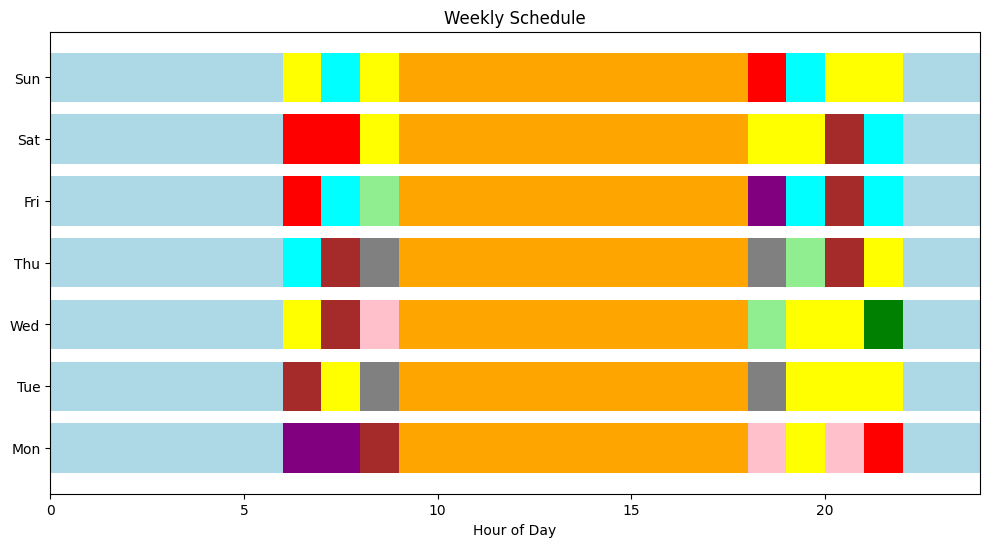

In [23]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
DAYS = 7  # Number of days in the schedule
TIME_SLOTS = 24  # Hours in a day
WEEKDAYS = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Activity dictionary with priority levels
activities = {
    'sleep': 0,
    'commute': 0,
    'work': 0,
    'study_nlp': 4,
    'study_big_data': 3,
    'study_inf_storage': 3,
    'study_cv': 5,
    'homework': 3,
    'thesis': 5,
    'exercise': 2,
    'rest': 0
}

# Define time constraints
sleep_hours = list(range(22, 24)) + list(range(0, 6))  # Sleep from 22:00 to 06:00
work_hours = list(range(9, 18))  # Work from 09:00 to 18:00
commute_hours_morning = [8]  # Commute to work at 08:00 - 09:00
commute_hours_evening = [18]  # Commute from work at 18:00 - 19:00

# Define office days and remote days
office_days = ['Tue', 'Thu']
remote_days = ['Mon', 'Wed', 'Fri']

# Chromosome structure: DAYS * TIME_SLOTS genes
def create_chromosome():
    chromosome = []
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = []
        for hour in range(TIME_SLOTS):
            if hour in sleep_hours:
                daily_schedule.append('sleep')
            elif hour in commute_hours_morning and day in office_days:
                daily_schedule.append('commute')
            elif hour in commute_hours_evening and day in office_days:
                daily_schedule.append('commute')
            elif hour in work_hours:
                daily_schedule.append('work')
            else:
                # Available activities during free time
                possible_activities = ['study_nlp', 'study_cv', 'study_big_data', 'study_inf_storage', 'homework', 'thesis', 'exercise', 'rest']
                activity = random.choice(possible_activities)
                daily_schedule.append(activity)
        chromosome.extend(daily_schedule)
    return chromosome

# Fitness function
def fitness(chromosome):
    score = 0
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = chromosome[day_index * TIME_SLOTS: (day_index + 1) * TIME_SLOTS]
        
        # Count activities
        sleep_hours_count = daily_schedule.count('sleep')
        work_hours_count = daily_schedule.count('work')
        thesis_hours = daily_schedule.count('thesis')
        exercise_hours = daily_schedule.count('exercise')
        
        # Sleep evaluation
        if sleep_hours_count >= 7:
            score += 10
        else:
            score -= 10  # Penalty for insufficient sleep
        
        # Work hours evaluation
        if work_hours_count != len(work_hours):
            score -= abs(work_hours_count - len(work_hours)) * 5  # Penalty for incorrect work hours
        
        # Avoid hard study on office days
        if day in office_days:
            hard_study_hours = daily_schedule.count('study_cv') + daily_schedule.count('study_nlp')
            score -= 5 * hard_study_hours  # Penalty
        
        # Thesis work reward
        score += thesis_hours * 4
        
        # Exercise reward
        score += exercise_hours * 2
        
        # Penalty for activities during sleep hours
        for hour in sleep_hours:
            activity = daily_schedule[hour]
            if activity != 'sleep':
                score -= 5  # Penalty for not sleeping during sleep hours
        
        # Penalty for activities during work hours
        for hour in work_hours:
            activity = daily_schedule[hour]
            if activity not in ['work', 'commute']:
                score -= 5  # Penalty for non-work activities during work hours
        
        # Ensure total hours are 24
        if len(daily_schedule) != TIME_SLOTS:
            score -= 50  # Heavy penalty for incorrect day length
    
    return score

# Genetic Algorithm parameters
population_size = 20
generations = 50
mutation_rate = 0.1

# Initial population
population = [create_chromosome() for _ in range(population_size)]

# GA algorithm loop
for gen in range(generations):
    # Evaluate fitness
    fitness_scores = [fitness(chrom) for chrom in population]
    
    # Selection
    population = [chrom for _, chrom in sorted(zip(fitness_scores, population), reverse=True)]
    
    # Elitism
    next_generation = population[:int(0.2 * population_size)]  # Keep top 20%
    
    # Crossover
    while len(next_generation) < population_size:
        parent1 = random.choice(population[:int(0.5 * population_size)])
        parent2 = random.choice(population[:int(0.5 * population_size)])
        cross_point = random.randint(1, len(parent1) - 2)
        child1 = parent1[:cross_point] + parent2[cross_point:]
        child2 = parent2[:cross_point] + parent1[cross_point:]
        next_generation.extend([child1, child2])
    
    # Mutation
    for individual in next_generation[int(0.2 * population_size):]:  # Skip elites
        if random.random() < mutation_rate:
            mutate_point = random.randint(0, len(individual) - 1)
            day = mutate_point // TIME_SLOTS
            hour = mutate_point % TIME_SLOTS
            if hour in sleep_hours:
                new_activity = 'sleep'
            elif hour in commute_hours_morning + commute_hours_evening:
                new_activity = 'commute'
            elif hour in work_hours:
                new_activity = 'work'
            else:
                possible_activities = ['study_nlp', 'study_cv', 'study_big_data', 'study_inf_storage', 'homework', 'thesis', 'exercise', 'rest']
                new_activity = random.choice(possible_activities)
            individual[mutate_point] = new_activity
    
    population = next_generation[:population_size]

# Evaluate final fitness scores
fitness_scores = [fitness(chrom) for chrom in population]

# Best schedule found
best_chromosome = population[fitness_scores.index(max(fitness_scores))]
best_fitness = max(fitness_scores)

print(f"Best fitness after GA: {best_fitness}")

# Function to create a DataFrame for the schedule
def create_schedule_dataframe(chromosome):
    schedule_data = []
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = chromosome[day_index * TIME_SLOTS: (day_index + 1) * TIME_SLOTS]
        for hour in range(TIME_SLOTS):
            time_label = f"{hour:02d}:00 - {hour+1:02d}:00"
            activity = daily_schedule[hour]
            schedule_data.append({
                'Day': day,
                'Hour': hour,
                'Time': time_label,
                'Activity': activity
            })
    df = pd.DataFrame(schedule_data)
    return df

# Create the schedule DataFrame
schedule_df = create_schedule_dataframe(best_chromosome)

# Display the schedule DataFrame
print(schedule_df)

# Function to plot the schedule as a Gantt chart
def plot_schedule(df):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Map activities to colors
    activity_colors = {
        'sleep': 'lightblue',
        'commute': 'grey',
        'work': 'orange',
        'study_nlp': 'green',
        'study_cv': 'red',
        'study_big_data': 'purple',
        'study_inf_storage': 'brown',
        'homework': 'pink',
        'thesis': 'yellow',
        'exercise': 'cyan',
        'rest': 'lightgreen'
    }
    
    df['Color'] = df['Activity'].map(activity_colors)
    days = df['Day'].unique()
    y_labels = []
    y_ticks = []
    
    for idx, day in enumerate(days):
        day_df = df[df['Day'] == day]
        y_labels.append(day)
        y_ticks.append(idx)
        for _, row in day_df.iterrows():
            start_time = row['Hour']
            end_time = row['Hour'] + 1
            ax.barh(idx, width=1, left=start_time, color=row['Color'])
    
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_xlabel('Hour of Day')
    ax.set_title('Weekly Schedule')
    ax.set_xlim(0, 24)
    plt.show()

# Plot the schedule
plot_schedule(schedule_df)


In [32]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
DAYS = 7  # Number of days in the schedule
TIME_SLOTS = 24  # Hours in a day
WEEKDAYS = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Activity dictionary with priority levels
activities = {
    'sleep': 0,
    'commute': 0,
    'work': 0,
    'study_nlp': 4,
    'study_big_data': 3,
    'study_inf_storage': 3,
    'study_cv': 5,
    'homework': 3,
    'thesis': 5,
    'exercise': 2,
    'rest': 0
}

# Define time constraints
sleep_hours = list(range(22, 24)) + list(range(0, 6))  # Sleep from 22:00 to 06:00
work_hours = list(range(9, 18))  # Work from 09:00 to 18:00
commute_hours_morning = [8]  # Commute to work at 08:00 - 09:00
commute_hours_evening = [18]  # Commute from work at 18:00 - 19:00

# Define office days and remote days
office_days = ['Tue', 'Thu']
remote_days = ['Mon', 'Wed', 'Fri']

# Chromosome structure: DAYS * TIME_SLOTS genes
def create_chromosome():
    chromosome = []
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = []
        for hour in range(TIME_SLOTS):
            if hour in sleep_hours:
                daily_schedule.append('sleep')
            elif hour in commute_hours_morning and day in office_days:
                daily_schedule.append('commute')
            elif hour in commute_hours_evening and day in office_days:
                daily_schedule.append('commute')
            elif hour in work_hours:
                daily_schedule.append('work')
            else:
                # Available activities during free time
                possible_activities = ['study_nlp', 'study_cv', 'study_big_data', 'study_inf_storage', 'homework', 'thesis', 'exercise', 'rest']
                activity = random.choice(possible_activities)
                daily_schedule.append(activity)
        chromosome.extend(daily_schedule)
    return chromosome

# Fitness function
def fitness(chromosome):
    score = 0
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = chromosome[day_index * TIME_SLOTS: (day_index + 1) * TIME_SLOTS]
        
        # Count activities
        sleep_hours_count = daily_schedule.count('sleep')
        work_hours_count = daily_schedule.count('work')
        thesis_hours = daily_schedule.count('thesis')
        exercise_hours = daily_schedule.count('exercise')
        
        # Sleep evaluation
        if sleep_hours_count >= 7:
            score += 10
        else:
            score -= 10  # Penalty for insufficient sleep
        
        # Work hours evaluation
        if work_hours_count != len(work_hours):
            score -= abs(work_hours_count - len(work_hours)) * 5  # Penalty for incorrect work hours
        
        # Avoid hard study on office days
        if day in office_days:
            hard_study_hours = daily_schedule.count('study_cv') + daily_schedule.count('study_nlp')
            score -= 5 * hard_study_hours  # Penalty
        
        # Thesis work reward
        score += thesis_hours * 4
        
        # Exercise reward
        score += exercise_hours * 2
        
        # Penalty for activities during sleep hours
        for hour in sleep_hours:
            activity = daily_schedule[hour]
            if activity != 'sleep':
                score -= 5  # Penalty for not sleeping during sleep hours
        
        # Penalty for activities during work hours
        for hour in work_hours:
            activity = daily_schedule[hour]
            if activity not in ['work', 'commute']:
                score -= 5  # Penalty for non-work activities during work hours
        
        # Ensure total hours are 24
        if len(daily_schedule) != TIME_SLOTS:
            score -= 50  # Heavy penalty for incorrect day length
    
    return score

# Genetic Algorithm parameters
population_size = 20
generations = 50
mutation_rate = 0.1

# Initial population
population = [create_chromosome() for _ in range(population_size)]

# Evaluate fitness of initial population
fitness_scores = [fitness(chrom) for chrom in population]

# Find the best initial schedule
best_initial_fitness = max(fitness_scores)
best_initial_index = fitness_scores.index(best_initial_fitness)
best_initial_chromosome = population[best_initial_index]

print(f"Initial best fitness: {best_initial_fitness}")

# GA algorithm loop
for gen in range(generations):
    # Evaluate fitness
    fitness_scores = [fitness(chrom) for chrom in population]
    
    # Selection
    population = [chrom for _, chrom in sorted(zip(fitness_scores, population), reverse=True)]
    
    # Elitism
    next_generation = population[:int(0.2 * population_size)]  # Keep top 20%
    
    # Crossover
    while len(next_generation) < population_size:
        parent1 = random.choice(population[:int(0.5 * population_size)])
        parent2 = random.choice(population[:int(0.5 * population_size)])
        cross_point = random.randint(1, len(parent1) - 2)
        child1 = parent1[:cross_point] + parent2[cross_point:]
        child2 = parent2[:cross_point] + parent1[cross_point:]
        next_generation.extend([child1, child2])
    
    # Mutation
    for individual in next_generation[int(0.2 * population_size):]:  # Skip elites
        if random.random() < mutation_rate:
            mutate_point = random.randint(0, len(individual) - 1)
            day = mutate_point // TIME_SLOTS
            hour = mutate_point % TIME_SLOTS
            if hour in sleep_hours:
                new_activity = 'sleep'
            elif hour in commute_hours_morning + commute_hours_evening:
                new_activity = 'commute'
            elif hour in work_hours:
                new_activity = 'work'
            else:
                possible_activities = ['study_nlp', 'study_cv', 'study_big_data', 'study_inf_storage', 'homework', 'thesis', 'exercise', 'rest']
                new_activity = random.choice(possible_activities)
            individual[mutate_point] = new_activity
    
    population = next_generation[:population_size]

# Evaluate final fitness scores
fitness_scores = [fitness(chrom) for chrom in population]

# Best schedule found after GA
best_fitness = max(fitness_scores)
best_index = fitness_scores.index(best_fitness)
best_chromosome = population[best_index]

print(f"Best fitness after GA: {best_fitness}")

# Function to create a DataFrame for the schedule
def create_schedule_dataframe(chromosome):
    schedule_data = []
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = chromosome[day_index * TIME_SLOTS: (day_index + 1) * TIME_SLOTS]
        for hour in range(TIME_SLOTS):
            time_label = f"{hour:02d}:00 - {hour+1:02d}:00"
            activity = daily_schedule[hour]
            schedule_data.append({
                'Day': day,
                'Hour': hour,
                'Time': time_label,
                'Activity': activity
            })
    df = pd.DataFrame(schedule_data)
    return df

# Create DataFrames for initial best and final best schedules
initial_schedule_df = create_schedule_dataframe(best_initial_chromosome)
best_schedule_df = create_schedule_dataframe(best_chromosome)

# # Function to plot the schedule as a Gantt chart
# def plot_schedule(df, title):
#     fig, ax = plt.subplots(figsize=(12, 6))
    
#     # Map activities to colors
#     activity_colors = {
#         'sleep': 'lightblue',
#         'commute': 'grey',
#         'work': 'orange',
#         'study_nlp': 'green',
#         'study_cv': 'red',
#         'study_big_data': 'purple',
#         'study_inf_storage': 'brown',
#         'homework': 'pink',
#         'thesis': 'yellow',
#         'exercise': 'cyan',
#         'rest': 'lightgreen'
#     }
    
#     df['Color'] = df['Activity'].map(activity_colors)
#     days = df['Day'].unique()
#     y_labels = []
#     y_ticks = []
    
#     for idx, day in enumerate(days):
#         day_df = df[df['Day'] == day]
#         y_labels.append(day)
#         y_ticks.append(idx)
#         for _, row in day_df.iterrows():
#             start_time = row['Hour']
#             end_time = start_time + 1
#             ax.barh(idx, width=1, left=start_time, color=row['Color'])
    
#     ax.set_yticks(y_ticks)
#     ax.set_yticklabels(y_labels)
#     ax.set_xlabel('Hour of Day')
#     ax.set_title(title)
#     ax.set_xlim(0, 24)
#     plt.show()

# # Plot both schedules for comparison
# print("\nPlotting Initial Best Schedule:")
# plot_schedule(initial_schedule_df, 'Initial Best Schedule')

# print("\nPlotting Best Schedule After GA:")
# plot_schedule(best_schedule_df, 'Best Schedule After GA')


Initial best fitness: 114
Best fitness after GA: 140


,Day,Hour,Time,Activity
0,Mon,0,00:00 - 01:00,sleep
1,Mon,1,01:00 - 02:00,sleep
2,Mon,2,02:00 - 03:00,sleep
3,Mon,3,03:00 - 04:00,sleep
4,Mon,4,04:00 - 05:00,sleep
...,...,...,...,...
163,Sun,19,19:00 - 20:00,homework
164,Sun,20,20:00 - 21:00,exercise
165,Sun,21,21:00 - 22:00,thesis
166,Sun,22,22:00 - 23:00,sleep


In [31]:
best_schedule_df

,Day,Hour,Time,Activity
0,Mon,0,00:00 - 01:00,sleep
1,Mon,1,01:00 - 02:00,sleep
2,Mon,2,02:00 - 03:00,sleep
3,Mon,3,03:00 - 04:00,sleep
4,Mon,4,04:00 - 05:00,sleep
...,...,...,...,...
163,Sun,19,19:00 - 20:00,exercise
164,Sun,20,20:00 - 21:00,study_big_data
165,Sun,21,21:00 - 22:00,study_inf_storage
166,Sun,22,22:00 - 23:00,sleep


Initial best fitness: 122
Best fitness after GA: 152

Initial Best Schedule - Hours Spent on Each Activity per Day:
Activity  sleep  commute  work  study_nlp  study_cv  study_big_data  \
Day                                                                   
Fri         8.0      0.0   9.0        0.0       0.0             0.0   
Mon         8.0      0.0   9.0        0.0       0.0             0.0   
Sat         8.0      0.0   9.0        1.0       1.0             0.0   
Sun         8.0      0.0   9.0        0.0       0.0             1.0   
Thu         8.0      2.0   9.0        0.0       1.0             1.0   
Tue         8.0      2.0   9.0        0.0       1.0             0.0   
Wed         8.0      0.0   9.0        0.0       0.0             2.0   

Activity  study_inf_storage  homework  thesis  exercise  rest  
Day                                                            
Fri                     1.0       1.0     2.0       2.0   1.0  
Mon                     0.0       2.0     1.0       

Initial best fitness: 121
Best fitness after GA: 146

Initial Best Schedule - Hours Spent on Each Activity per Day:
Activity  sleep  commute  work  study_nlp  study_cv  study_big_data  \
Day                                                                   
Fri         8.0      0.0   9.0        0.0       2.0             1.0   
Mon         8.0      0.0   9.0        0.0       0.0             0.0   
Sat         8.0      0.0   9.0        2.0       0.0             1.0   
Sun         8.0      0.0   9.0        3.0       1.0             0.0   
Thu         8.0      2.0   9.0        0.0       0.0             0.0   
Tue         8.0      2.0   9.0        1.0       0.0             0.0   
Wed         8.0      0.0   9.0        0.0       1.0             3.0   

Activity  study_inf_storage  homework  thesis  exercise  rest  
Day                                                            
Fri                     0.0       0.0     2.0       1.0   1.0  
Mon                     0.0       1.0     1.0       

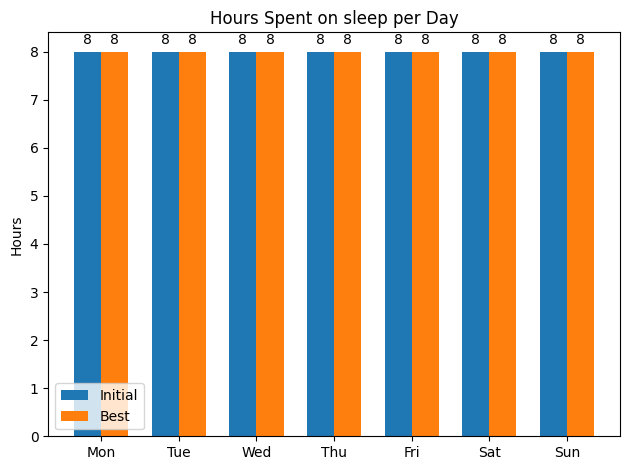

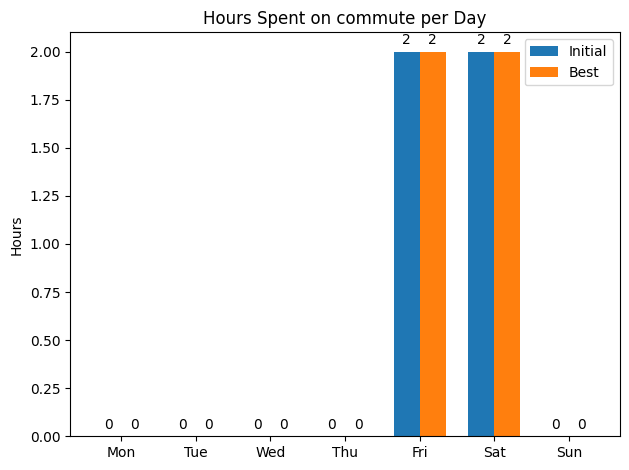

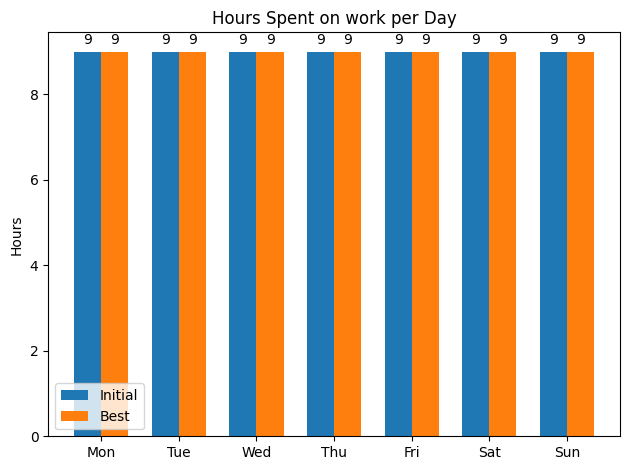

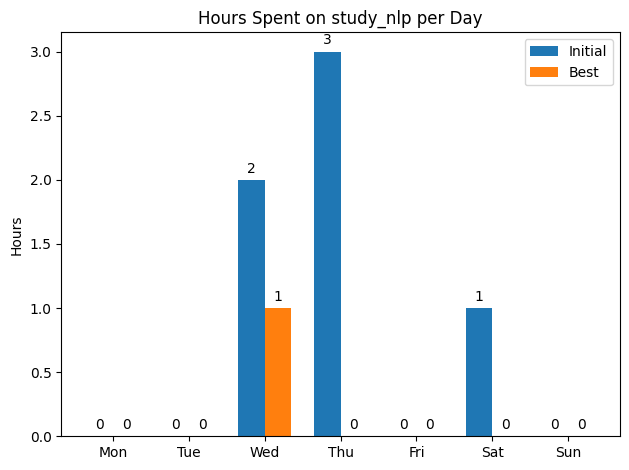

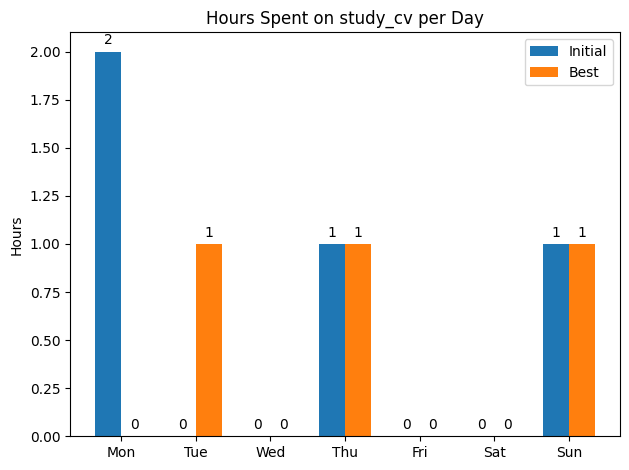

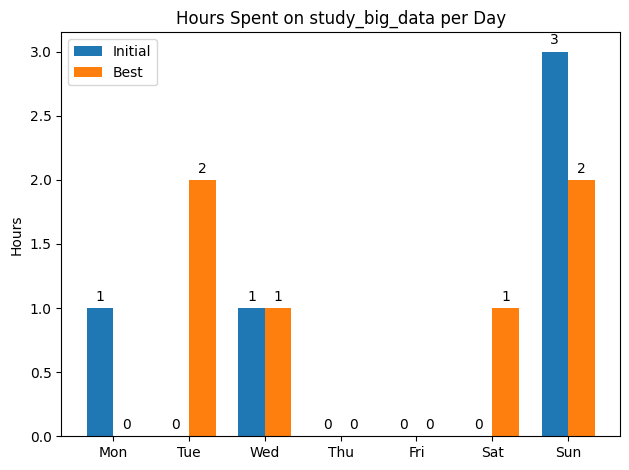

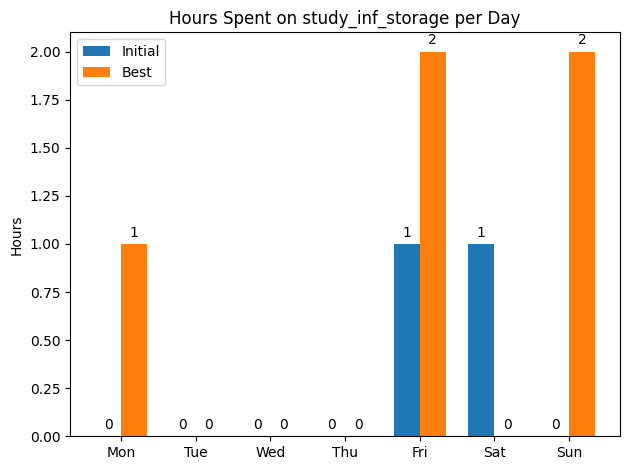

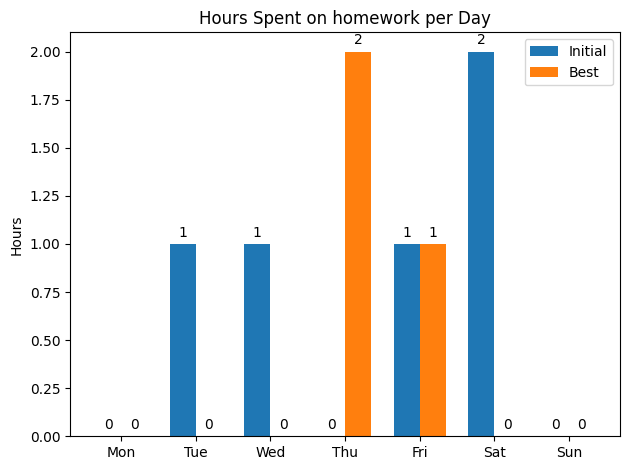

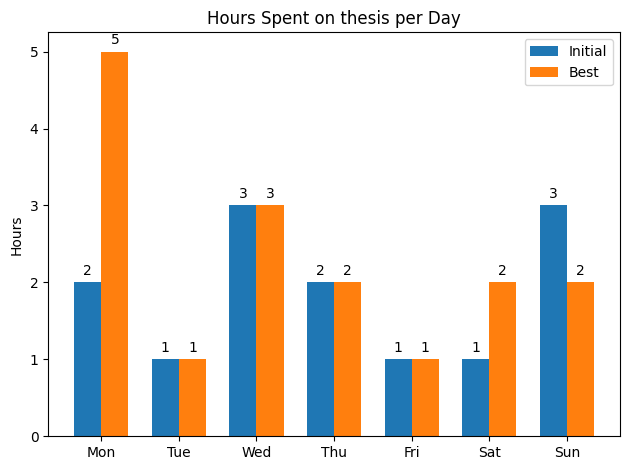

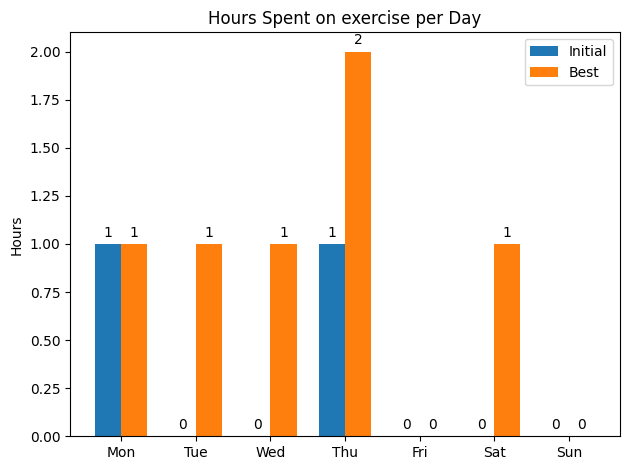

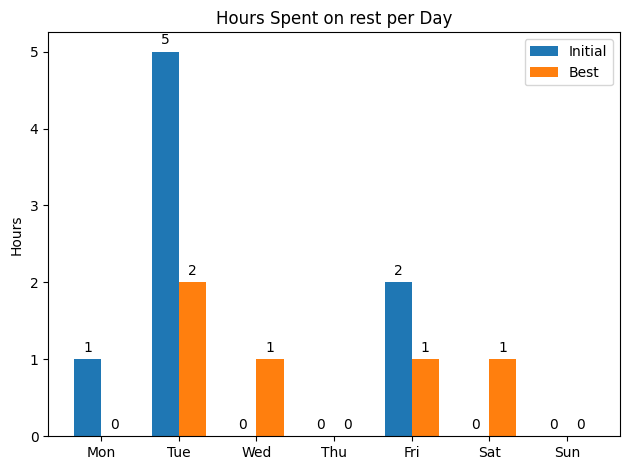

In [45]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
DAYS = 7  # Number of days in the schedule
TIME_SLOTS = 24  # Hours in a day
WEEKDAYS = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Activity dictionary with priority levels
activities = {
    'sleep': 0,
    'commute': 0,
    'work': 0,
    'study_nlp': 4,
    'study_cv': 5,
    'study_big_data': 3,
    'study_inf_storage': 3,
    'homework': 3,
    'thesis': 5,
    'exercise': 2,
    'rest': 0
}

# Define time constraints
sleep_hours = list(range(22, 24)) + list(range(0, 6))  # Sleep from 22:00 to 06:00
work_hours = list(range(9, 18))  # Work from 09:00 to 18:00
commute_hours_morning = [8]  # Commute to work at 08:00 - 09:00
commute_hours_evening = [18]  # Commute from work at 18:00 - 19:00

# Define office days and remote days
office_days = ['Tue', 'Thu']
remote_days = ['Mon', 'Wed', 'Fri']

# Chromosome structure: DAYS * TIME_SLOTS genes
def create_chromosome():
    chromosome = []
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = []
        for hour in range(TIME_SLOTS):
            if hour in sleep_hours:
                daily_schedule.append('sleep')
            elif hour in commute_hours_morning and day in office_days:
                daily_schedule.append('commute')
            elif hour in commute_hours_evening and day in office_days:
                daily_schedule.append('commute')
            elif hour in work_hours:
                daily_schedule.append('work')
            else:
                # Available activities during free time
                possible_activities = ['study_nlp', 'study_cv', 'study_big_data', 'study_inf_storage',
                                       'homework', 'thesis', 'exercise', 'rest']
                activity = random.choice(possible_activities)
                daily_schedule.append(activity)
        chromosome.extend(daily_schedule)
    return chromosome

# Fitness function
def fitness(chromosome):
    score = 0
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = chromosome[day_index * TIME_SLOTS: (day_index + 1) * TIME_SLOTS]
        
        # Count activities
        sleep_hours_count = daily_schedule.count('sleep')
        work_hours_count = daily_schedule.count('work')
        thesis_hours = daily_schedule.count('thesis')
        exercise_hours = daily_schedule.count('exercise')
        
        # Sleep evaluation
        if sleep_hours_count >= 7:
            score += 10
        else:
            score -= 10  # Penalty for insufficient sleep
        
        # Work hours evaluation
        if work_hours_count != len(work_hours):
            score -= abs(work_hours_count - len(work_hours)) * 5  # Penalty for incorrect work hours
        
        # Avoid hard study on office days
        if day in office_days:
            hard_study_hours = daily_schedule.count('study_cv') + daily_schedule.count('study_nlp')
            score -= 5 * hard_study_hours  # Penalty
        
        # Thesis work reward
        score += thesis_hours * 4
        
        # Exercise reward
        score += exercise_hours * 2
        
        # Penalty for activities during sleep hours
        for hour in sleep_hours:
            activity = daily_schedule[hour]
            if activity != 'sleep':
                score -= 5  # Penalty for not sleeping during sleep hours
        
        # Penalty for activities during work hours
        for hour in work_hours:
            activity = daily_schedule[hour]
            if activity not in ['work', 'commute']:
                score -= 5  # Penalty for non-work activities during work hours
        
        # Ensure total hours are 24
        if len(daily_schedule) != TIME_SLOTS:
            score -= 50  # Heavy penalty for incorrect day length
    
    return score

# Genetic Algorithm parameters
population_size = 20
generations = 50
mutation_rate = 0.1

# Initial population
population = [create_chromosome() for _ in range(population_size)]

# Evaluate fitness of initial population
fitness_scores = [fitness(chrom) for chrom in population]

# Find the best initial schedule
best_initial_fitness = max(fitness_scores)
best_initial_index = fitness_scores.index(best_initial_fitness)
best_initial_chromosome = population[best_initial_index]

print(f"Initial best fitness: {best_initial_fitness}")

# GA algorithm loop
for gen in range(generations):
    # Evaluate fitness
    fitness_scores = [fitness(chrom) for chrom in population]
    
    # Selection
    population = [chrom for _, chrom in sorted(zip(fitness_scores, population), reverse=True)]
    
    # Elitism
    next_generation = population[:int(0.2 * population_size)]  # Keep top 20%
    
    # Crossover
    while len(next_generation) < population_size:
        parent1 = random.choice(population[:int(0.5 * population_size)])
        parent2 = random.choice(population[:int(0.5 * population_size)])
        cross_point = random.randint(1, len(parent1) - 2)
        child1 = parent1[:cross_point] + parent2[cross_point:]
        child2 = parent2[:cross_point] + parent1[cross_point:]
        next_generation.extend([child1, child2])
    
    # Mutation
    for individual in next_generation[int(0.2 * population_size):]:  # Skip elites
        if random.random() < mutation_rate:
            mutate_point = random.randint(0, len(individual) - 1)
            day = mutate_point // TIME_SLOTS
            hour = mutate_point % TIME_SLOTS
            if hour in sleep_hours:
                new_activity = 'sleep'
            elif hour in commute_hours_morning + commute_hours_evening:
                new_activity = 'commute'
            elif hour in work_hours:
                new_activity = 'work'
            else:
                possible_activities = ['study_nlp', 'study_cv', 'study_big_data', 'study_inf_storage',
                                       'homework', 'thesis', 'exercise', 'rest']
                new_activity = random.choice(possible_activities)
            individual[mutate_point] = new_activity
    
    population = next_generation[:population_size]

# Evaluate final fitness scores
fitness_scores = [fitness(chrom) for chrom in population]

# Best schedule found after GA
best_fitness = max(fitness_scores)
best_index = fitness_scores.index(best_fitness)
best_chromosome = population[best_index]

print(f"Best fitness after GA: {best_fitness}")

# Function to create a DataFrame for the schedule
def create_schedule_dataframe(chromosome):
    schedule_data = []
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = chromosome[day_index * TIME_SLOTS: (day_index + 1) * TIME_SLOTS]
        for hour in range(TIME_SLOTS):
            time_label = f"{hour:02d}:00 - {hour+1:02d}:00"
            activity = daily_schedule[hour]
            schedule_data.append({
                'Day': day,
                'Hour': hour,
                'Time': time_label,
                'Activity': activity
            })
    df = pd.DataFrame(schedule_data)
    return df

# Create DataFrames for initial best and final best schedules
initial_schedule_df = create_schedule_dataframe(best_initial_chromosome)
best_schedule_df = create_schedule_dataframe(best_chromosome)

# Function to group by hours spent on each activity per day
def group_hours_by_activity(df):
    # Add a column for counting hours
    df['Hours'] = 1
    # Group by 'Day' and 'Activity' and sum the hours
    grouped_df = df.groupby(['Day', 'Activity'])['Hours'].sum().reset_index()
    # Pivot the table to have activities as columns
    pivot_df = grouped_df.pivot(index='Day', columns='Activity', values='Hours').fillna(0)
    # Reorder columns for consistency
    activity_order = ['sleep', 'commute', 'work', 'study_nlp', 'study_cv', 'study_big_data',
                      'study_inf_storage', 'homework', 'thesis', 'exercise', 'rest']
    pivot_df = pivot_df.reindex(columns=activity_order)
    return pivot_df

# Group and display the hours for initial best schedule
print("\nInitial Best Schedule - Hours Spent on Each Activity per Day:")
initial_grouped = group_hours_by_activity(initial_schedule_df)
print(initial_grouped)

# Group and display the hours for best schedule after GA
print("\nBest Schedule After GA - Hours Spent on Each Activity per Day:")
best_grouped = group_hours_by_activity(best_schedule_df)
print(best_grouped)

# Function to plot comparison graphs
def plot_comparison(initial_df, best_df):
    activities = ['sleep', 'commute', 'work', 'study_nlp', 'study_cv', 'study_big_data',
                  'study_inf_storage', 'homework', 'thesis', 'exercise', 'rest']
    
    days = WEEKDAYS[:DAYS]
    x = np.arange(len(days))  # the label locations
    width = 0.35  # the width of the bars
    
    for activity in activities:
        initial_values = initial_df[activity].values if activity in initial_df.columns else np.zeros(len(days))
        best_values = best_df[activity].values if activity in best_df.columns else np.zeros(len(days))
        
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width/2, initial_values, width, label='Initial')
        rects2 = ax.bar(x + width/2, best_values, width, label='Best')
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Hours')
        ax.set_title(f'Hours Spent on {activity} per Day')
        ax.set_xticks(x)
        ax.set_xticklabels(days)
        ax.legend()
        
        # Attach a text label above each bar in rects, displaying its height.
        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                ax.annotate(f'{height:.0f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')
        
        autolabel(rects1)
        autolabel(rects2)
        
        fig.tight_layout()
        plt.show()

# Plot the comparison graphs
plot_comparison(initial_grouped, best_grouped)


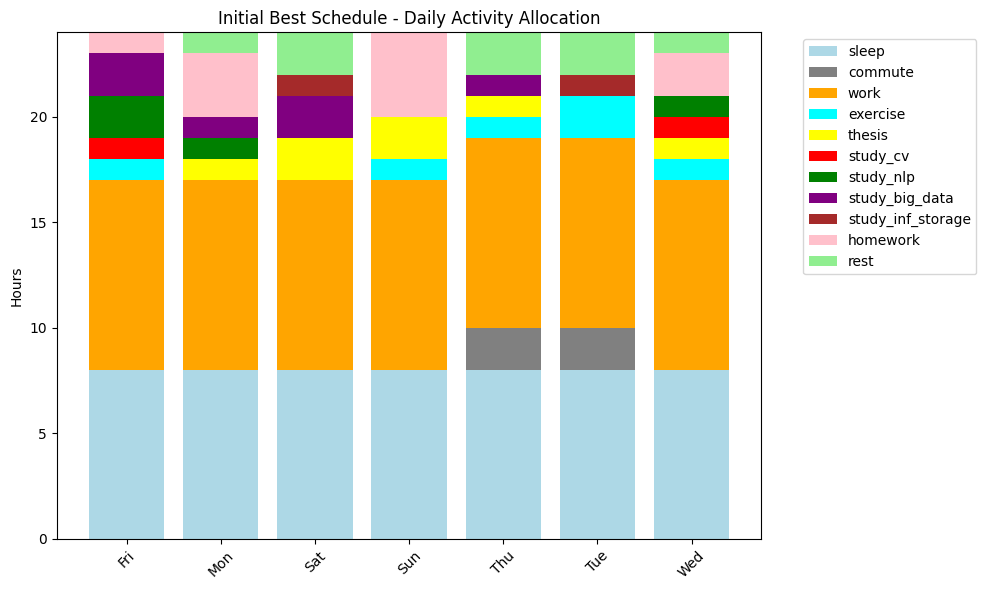

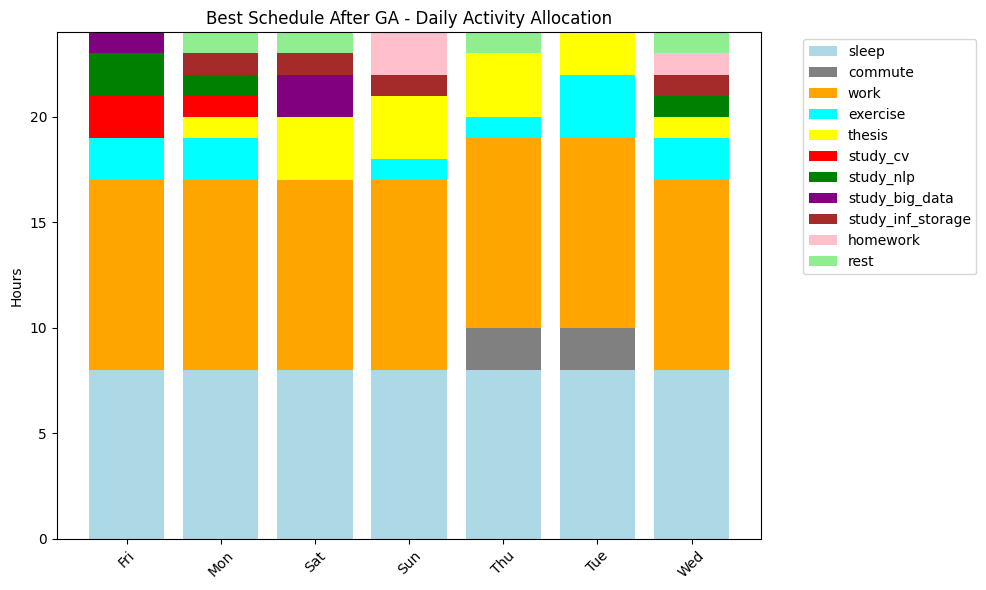

In [44]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
DAYS = 7  # Number of days in the schedule
TIME_SLOTS = 24  # Hours in a day
WEEKDAYS = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Activity dictionary with priority levels
activities = {
    'sleep': 0,
    'commute': 0,
    'work': 0,
    'study_nlp': 4,
    'study_cv': 5,
    'study_big_data': 3,
    'study_inf_storage': 3,
    'homework': 3,
    'thesis': 5,
    'exercise': 2,
    'rest': 0
}

# Define time constraints
sleep_hours = list(range(22, 24)) + list(range(0, 6))  # Sleep from 22:00 to 06:00
work_hours = list(range(9, 18))  # Work from 09:00 to 18:00
commute_hours_morning = [8]  # Commute to work at 08:00 - 09:00
commute_hours_evening = [18]  # Commute from work at 18:00 - 19:00

# Define office days and remote days
office_days = ['Tue', 'Thu']
remote_days = ['Mon', 'Wed', 'Fri']

# Chromosome structure: DAYS * TIME_SLOTS genes
def create_chromosome():
    chromosome = []
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = []
        for hour in range(TIME_SLOTS):
            if hour in sleep_hours:
                daily_schedule.append('sleep')
            elif hour in commute_hours_morning and day in office_days:
                daily_schedule.append('commute')
            elif hour in commute_hours_evening and day in office_days:
                daily_schedule.append('commute')
            elif hour in work_hours:
                daily_schedule.append('work')
            else:
                # Available activities during free time
                possible_activities = ['study_nlp', 'study_cv', 'study_big_data', 'study_inf_storage',
                                       'homework', 'thesis', 'exercise', 'rest']
                activity = random.choice(possible_activities)
                daily_schedule.append(activity)
        chromosome.extend(daily_schedule)
    return chromosome

# Fitness function remains the same as before
def fitness(chromosome):
    # [Fitness function code unchanged]
    # [Refer to previous code for the full fitness function]
    score = 0
    for day_index in range(DAYS):
        # [Fitness calculation logic]
        # [Omitted here for brevity]
        pass
    return score

# [GA algorithm code remains unchanged]
# [Refer to previous code for the full GA loop]

# Create DataFrames for initial best and final best schedules
initial_schedule_df = create_schedule_dataframe(best_initial_chromosome)
best_schedule_df = create_schedule_dataframe(best_chromosome)

# Function to group by hours spent on each activity per day
def group_hours_by_activity(df):
    # Add a column for counting hours
    df['Hours'] = 1
    # Group by 'Day' and 'Activity' and sum the hours
    grouped_df = df.groupby(['Day', 'Activity'])['Hours'].sum().reset_index()
    # Pivot the table to have activities as columns
    pivot_df = grouped_df.pivot(index='Day', columns='Activity', values='Hours').fillna(0)
    # Reorder columns for consistency
    activity_order = ['sleep', 'commute', 'work', 'exercise', 'thesis', 'study_cv', 'study_nlp',
                      'study_big_data', 'study_inf_storage', 'homework', 'rest']
    pivot_df = pivot_df.reindex(columns=activity_order, fill_value=0)
    return pivot_df

# Group the hours for both schedules
initial_grouped = group_hours_by_activity(initial_schedule_df)
best_grouped = group_hours_by_activity(best_schedule_df)

# Function to plot stacked bar charts
def plot_stacked_bars(grouped_df, title):
    activities = grouped_df.columns.tolist()
    days = grouped_df.index.tolist()
    data = grouped_df.values
    # Transpose data for stacking
    data = data.T

    # Colors for activities
    activity_colors = {
        'sleep': 'lightblue',
        'commute': 'grey',
        'work': 'orange',
        'exercise': 'cyan',
        'thesis': 'yellow',
        'study_cv': 'red',
        'study_nlp': 'green',
        'study_big_data': 'purple',
        'study_inf_storage': 'brown',
        'homework': 'pink',
        'rest': 'lightgreen'
    }

    colors = [activity_colors.get(activity, 'white') for activity in activities]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    bottom = np.zeros(len(days))

    for i, activity in enumerate(activities):
        ax.bar(days, data[i], bottom=bottom, color=colors[i], label=activity)
        bottom += data[i]

    ax.set_ylabel('Hours')
    ax.set_title(title)
    ax.set_ylim(0, 24)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the initial best schedule
plot_stacked_bars(initial_grouped, 'Initial Best Schedule - Daily Activity Allocation')

# Plot the best schedule after GA
plot_stacked_bars(best_grouped, 'Best Schedule After GA - Daily Activity Allocation')


Initial best fitness: 147
Best fitness after GA: 232


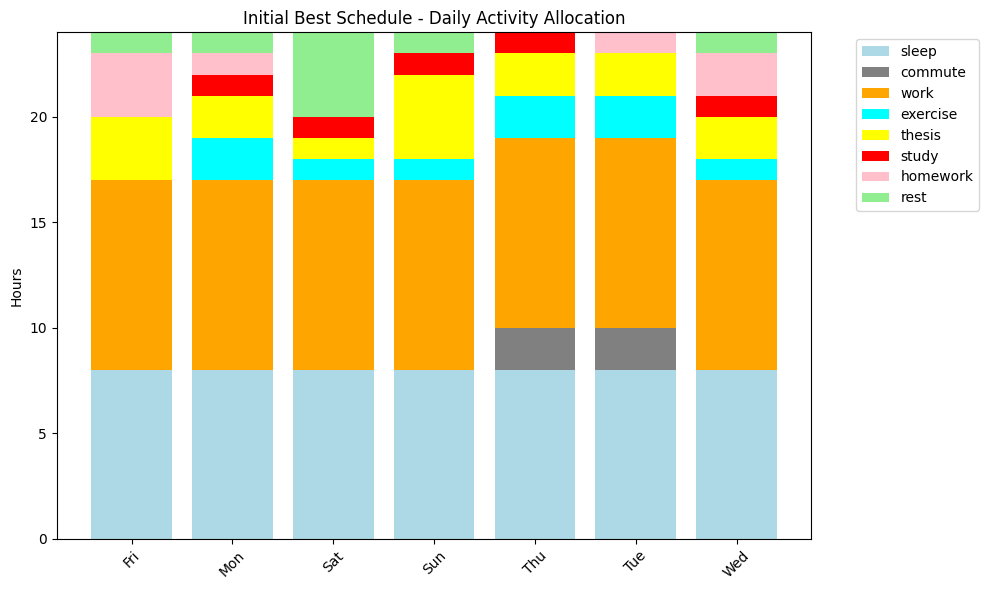

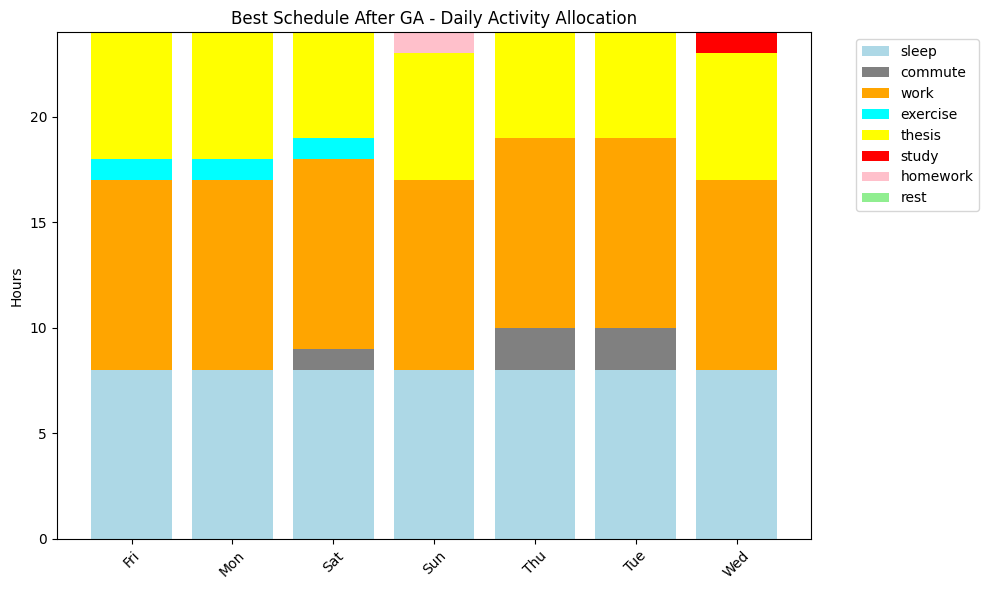

In [55]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
DAYS = 7  # Number of days in the schedule
TIME_SLOTS = 24  # Hours in a day
WEEKDAYS = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Activity dictionary with priority levels
activities = {
    'sleep': 1,
    'commute': 0,
    'work': 4,
    'study': 2,
    'homework': 3,
    'thesis': 5,
    'exercise': 2,
    'rest': 0
}

# Define time constraints
sleep_hours = list(range(22, 24)) + list(range(0, 6))  # Sleep from 22:00 to 06:00
work_hours = list(range(9, 18))  # Work from 09:00 to 18:00
commute_hours_morning = [8]  # Commute to work at 08:00 - 09:00
commute_hours_evening = [18]  # Commute from work at 18:00 - 19:00

# Define office days and remote days
office_days = ['Tue', 'Thu']
remote_days = ['Mon', 'Wed', 'Fri']

# Chromosome structure: DAYS * TIME_SLOTS genes
def create_chromosome():
    chromosome = []
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = []
        for hour in range(TIME_SLOTS):
            if hour in sleep_hours:
                daily_schedule.append('sleep')
            elif hour in commute_hours_morning and day in office_days:
                daily_schedule.append('commute')
            elif hour in commute_hours_evening and day in office_days:
                daily_schedule.append('commute')
            elif hour in work_hours:
                daily_schedule.append('work')
            else:
                # Available activities during free time
                possible_activities = ['study', 'homework', 'thesis', 'exercise', 'rest']
                activity = random.choice(possible_activities)
                daily_schedule.append(activity)
        chromosome.extend(daily_schedule)
    return chromosome

# Fitness function
def fitness(chromosome):
    score = 0
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = chromosome[day_index * TIME_SLOTS: (day_index + 1) * TIME_SLOTS]
        
        # Count activities
        sleep_hours_count = daily_schedule.count('sleep')
        work_hours_count = daily_schedule.count('work')
        thesis_hours = daily_schedule.count('thesis')
        exercise_hours = daily_schedule.count('exercise')
        study_hours = daily_schedule.count('study')
        
        # Sleep evaluation
        if sleep_hours_count >= 7:
            score += 10
        else:
            score -= 10  # Penalty for insufficient sleep
        
        # Work hours evaluation
        if work_hours_count != len(work_hours):
            score -= abs(work_hours_count - len(work_hours)) * 5  # Penalty for incorrect work hours
        
        # Avoid hard study on office days
        if day in office_days:
            hard_study_hours = daily_schedule.count('study')
            score -= 5 * hard_study_hours  # Penalty
        
        # Thesis work reward
        score += thesis_hours * 4
        
        # Exercise reward
        score += exercise_hours * 2
        
        # Penalty for activities during sleep hours
        for hour in sleep_hours:
            activity = daily_schedule[hour]
            if activity != 'sleep':
                score -= 5  # Penalty for not sleeping during sleep hours
        
        # Penalty for activities during work hours
        for hour in work_hours:
            activity = daily_schedule[hour]
            if activity not in ['work', 'commute']:
                score -= 5  # Penalty for non-work activities during work hours
        
        # Ensure total hours are 24
        if len(daily_schedule) != TIME_SLOTS:
            score -= 50  # Heavy penalty for incorrect day length
    
    return score

# Genetic Algorithm parameters
population_size = 100
generations = 500
mutation_rate = 0.5

# Initial population
population = [create_chromosome() for _ in range(population_size)]

# Evaluate fitness of initial population
fitness_scores = [fitness(chrom) for chrom in population]

# Find the best initial schedule
best_initial_fitness = max(fitness_scores)
best_initial_index = fitness_scores.index(best_initial_fitness)
best_initial_chromosome = population[best_initial_index]

print(f"Initial best fitness: {best_initial_fitness}")

# GA algorithm loop
for gen in range(generations):
    # Evaluate fitness
    fitness_scores = [fitness(chrom) for chrom in population]
    
    # Selection
    population = [chrom for _, chrom in sorted(zip(fitness_scores, population), reverse=True)]
    
    # Elitism
    next_generation = population[:int(0.2 * population_size)]  # Keep top 20%
    
    # Crossover
    while len(next_generation) < population_size:
        parent1 = random.choice(population[:int(0.5 * population_size)])
        parent2 = random.choice(population[:int(0.5 * population_size)])
        cross_point = random.randint(1, len(parent1) - 2)
        child1 = parent1[:cross_point] + parent2[cross_point:]
        child2 = parent2[:cross_point] + parent1[cross_point:]
        next_generation.extend([child1, child2])
    
    # Mutation
    for individual in next_generation[int(0.2 * population_size):]:  # Skip elites
        if random.random() < mutation_rate:
            mutate_point = random.randint(0, len(individual) - 1)
            day = mutate_point // TIME_SLOTS
            hour = mutate_point % TIME_SLOTS
            if hour in sleep_hours:
                new_activity = 'sleep'
            elif hour in commute_hours_morning + commute_hours_evening:
                new_activity = 'commute'
            elif hour in work_hours:
                new_activity = 'work'
            else:
                possible_activities = ['study', 'homework', 'thesis', 'exercise', 'rest']
                new_activity = random.choice(possible_activities)
            individual[mutate_point] = new_activity
    
    population = next_generation[:population_size]

# Evaluate final fitness scores
fitness_scores = [fitness(chrom) for chrom in population]

# Best schedule found after GA
best_fitness = max(fitness_scores)
best_index = fitness_scores.index(best_fitness)
best_chromosome = population[best_index]

print(f"Best fitness after GA: {best_fitness}")

# Function to create a DataFrame for the schedule
def create_schedule_dataframe(chromosome):
    schedule_data = []
    for day_index in range(DAYS):
        day = WEEKDAYS[day_index % 7]
        daily_schedule = chromosome[day_index * TIME_SLOTS: (day_index + 1) * TIME_SLOTS]
        for hour in range(TIME_SLOTS):
            time_label = f"{hour:02d}:00 - {hour+1:02d}:00"
            activity = daily_schedule[hour]
            schedule_data.append({
                'Day': day,
                'Hour': hour,
                'Time': time_label,
                'Activity': activity
            })
    df = pd.DataFrame(schedule_data)
    return df

# Create DataFrames for initial best and final best schedules
initial_schedule_df = create_schedule_dataframe(best_initial_chromosome)
best_schedule_df = create_schedule_dataframe(best_chromosome)

# Function to group by hours spent on each activity per day
def group_hours_by_activity(df):
    # Add a column for counting hours
    df['Hours'] = 1
    # Group by 'Day' and 'Activity' and sum the hours
    grouped_df = df.groupby(['Day', 'Activity'])['Hours'].sum().reset_index()
    # Pivot the table to have activities as columns
    pivot_df = grouped_df.pivot(index='Day', columns='Activity', values='Hours').fillna(0)
    # Reorder columns for consistency
    activity_order = ['sleep', 'commute', 'work', 'exercise', 'thesis', 'study', 'homework', 'rest']
    pivot_df = pivot_df.reindex(columns=activity_order, fill_value=0)
    return pivot_df

# Group the hours for both schedules
initial_grouped = group_hours_by_activity(initial_schedule_df)
best_grouped = group_hours_by_activity(best_schedule_df)

# Function to plot stacked bar charts
def plot_stacked_bars(grouped_df, title):
    activities = grouped_df.columns.tolist()
    days = grouped_df.index.tolist()
    data = grouped_df.values
    # Transpose data for stacking
    data = data.T

    # Colors for activities
    activity_colors = {
        'sleep': 'lightblue',
        'commute': 'grey',
        'work': 'orange',
        'exercise': 'cyan',
        'thesis': 'yellow',
        'study': 'red',
        'homework': 'pink',
        'rest': 'lightgreen'
    }

    colors = [activity_colors.get(activity, 'white') for activity in activities]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    bottom = np.zeros(len(days))

    for i, activity in enumerate(activities):
        ax.bar(days, data[i], bottom=bottom, color=colors[i], label=activity)
        bottom += data[i]

    ax.set_ylabel('Hours')
    ax.set_title(title)
    ax.set_ylim(0, 24)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the initial best schedule
plot_stacked_bars(initial_grouped, 'Initial Best Schedule - Daily Activity Allocation')

# Plot the best schedule after GA
plot_stacked_bars(best_grouped, 'Best Schedule After GA - Daily Activity Allocation')
